Finance Data Project:

In [2]:
import yfinance as yf
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

**Data:
need to get data using pandas datareader. I will get stock information for the following banks:

  Bank of America,  
  CitiGroup,   
  Goldman Sachs,  
  JPMorgan Chase,  
  Morgan Stanley,  
  Wells Fargo  **

Get the Data :
pandas to directly read data from yfinance using pandas.

In [5]:
# Define the stock tickers
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]
start = "2006-01-01"
end = "2016-01-01"

# Dictionary to store each bank's stock data
data_dict = {}

# Fetch and organize data for each ticker
for ticker in tickers:
    data_dict[ticker] = yf.download(ticker, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Combine all data into a single DataFrame
bank_stocks = pd.concat(data_dict, axis=1,)

In [8]:
print(bank_stocks.columns.nlevels)

3


In [9]:
if bank_stocks.columns.nlevels == 3:
    bank_stocks.columns.names = ['Bank Ticker', 'Date', 'Stock Info']
else:
    raise ValueError("Unexpected number of levels in MultiIndex.")

In [10]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Date         Adj Close      Close       High        Low       Open    Volume   
Stock Info         BAC        BAC        BAC        BAC        BAC       BAC   
Date                                                                           
2006-01-03   31.370394  47.080002  47.180000  46.150002  46.919998  16296700   
2006-01-04   31.037233  46.580002  47.240002  46.450001  47.000000  17757900   
2006-01-05   31.077223  46.639999  46.830002  46.320000  46.580002  14970700   
2006-01-06   31.030579  46.570000  46.910000  46.349998  46.799999  12599800   
2006-01-09   31.050571  46.599998  46.970001  46.360001  46.720001  15619400   

Bank Ticker           C                                      ...         MS  \
Date          Adj Close       Close        High         Low  ...       High   
Stock Info            C           C           C           C  ...         MS   
Date                                                         ...              
2006-01-03   326.256836  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04   320.233398  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05   321.822021  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06   321.822021  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09   320.299469  483.899994  487.399994  483.000000  ...  59.290001   

Bank Ticker                                       WFC                        \
Date               Low       Open   Volume  Adj Close      Close       High   
Stock Info          MS         MS       MS        WFC        WFC        WFC   
Date                                                                          
2006-01-03   56.740002  57.169998  5377000  18.870817  31.900000  31.975000   
2006-01-04   58.349998  58.700001  7977800  18.651941  31.530001  31.820000   
2006-01-05   58.020000  58.549999  5778000  18.631245  31.495001  31.555000   
2006-01-06   58.049999  58.770000  6889800  18.740679  31.680000  31.775000   
2006-01-09   58.619999  58.630001  4144500  18.737720  31.674999  31.825001   

Bank Ticker                                  
Date               Low       Open    Volume  
Stock Info         WFC        WFC       WFC  
Date                                         
2006-01-03   31.195000  31.600000  11016400  
2006-01-04   31.365000  31.799999  10870000  
2006-01-05   31.309999  31.500000  10158000  
2006-01-06   31.385000  31.580000   8403800  
2006-01-09   31.555000  31.674999   5619600  

[5 rows x 36 columns]

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks['BAC']['Close'].max()

Stock Info
BAC    54.900002
dtype: float64

In [13]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())
    

BAC Stock Info
BAC    54.900002
dtype: float64
C Stock Info
C    564.099976
dtype: float64
GS Stock Info
GS    247.919998
dtype: float64
JPM Stock Info
JPM    70.080002
dtype: float64
MS Stock Info
MS    89.300003
dtype: float64
WFC Stock Info
WFC    58.52
dtype: float64


In [14]:
bank_stocks.xs(key='Close', axis=1, level='Date').max()

Bank Ticker  Stock Info
BAC          BAC            54.900002
C            C             564.099976
GS           GS            247.919998
JPM          JPM            70.080002
MS           MS             89.300003
WFC          WFC            58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

 
 $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

 
I can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**


In [16]:
Returns = pd.DataFrame()

In [17]:
for tick in tickers:
    Returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
Returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? **

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

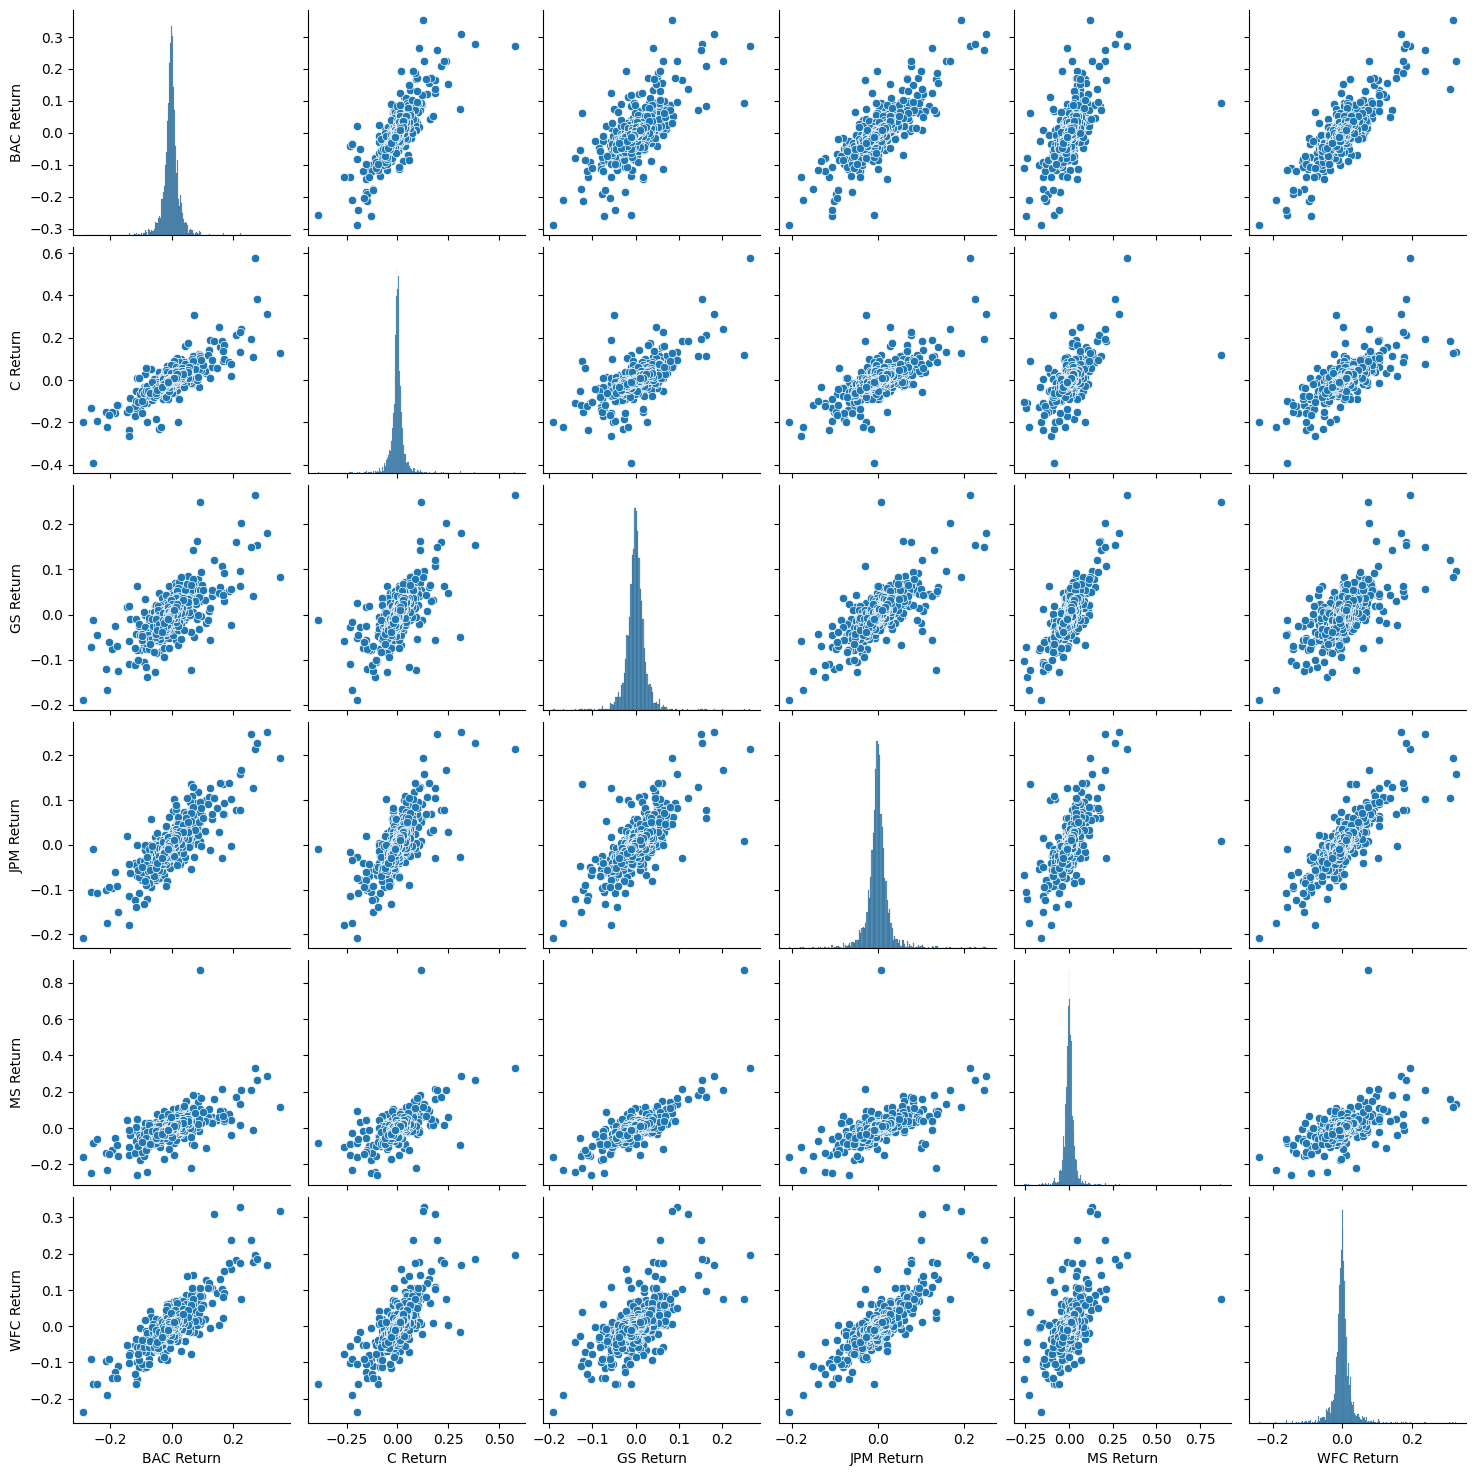

In [20]:
sns.pairplot(Returns[1:])
plt.show()

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [22]:
Returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [23]:
Returns['BAC Return'].min()

-0.2896935896149381

In [24]:
Returns.idxmin()  ### Worst Drop (4 of them on Inauguration day)

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [26]:
# Best single day gain
Returns.idxmax()  ### citigroup stock split in May 2011, but also JPM day after inauguration.

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [28]:
Returns.std() ## Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [29]:
Returns.loc['2015-01-01':'2015-12-31'].std()   ## Very similar risk profiles

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

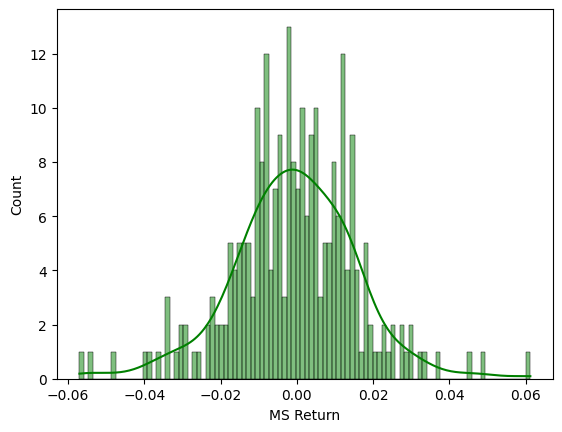

In [31]:
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins =100,kde =True)
plt.show()

* Create a distplot using seaborn of the 2008 returns for CitiGroup **

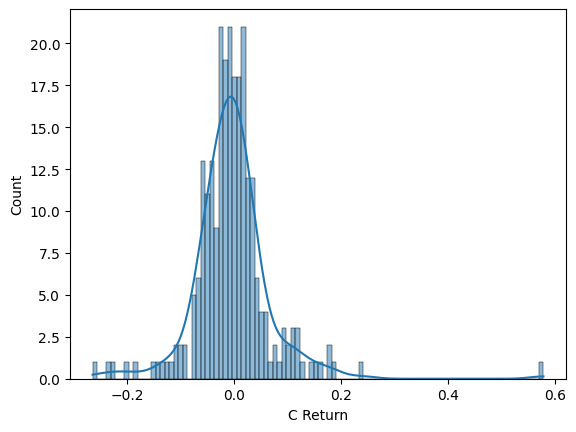

In [33]:
sns.histplot(Returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100,kde=True)
plt.show()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.**

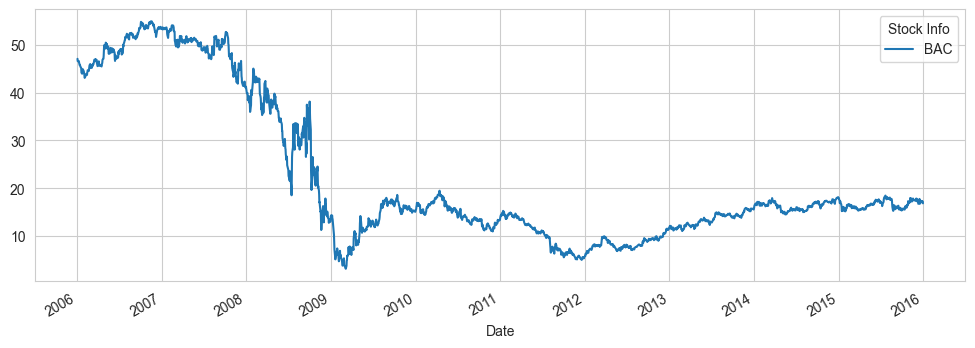

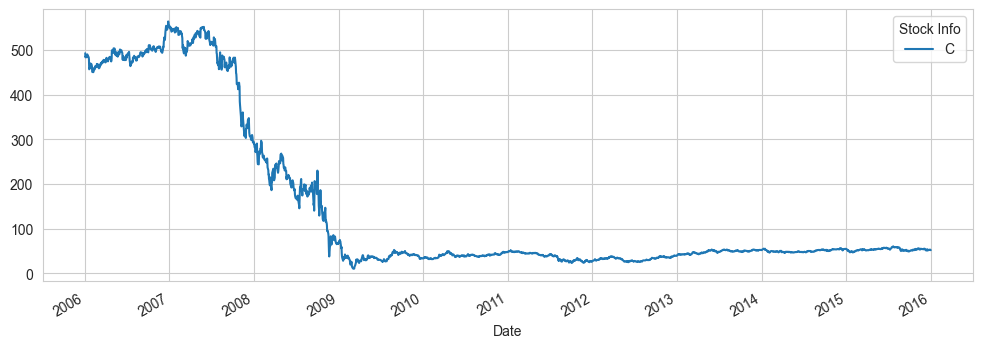

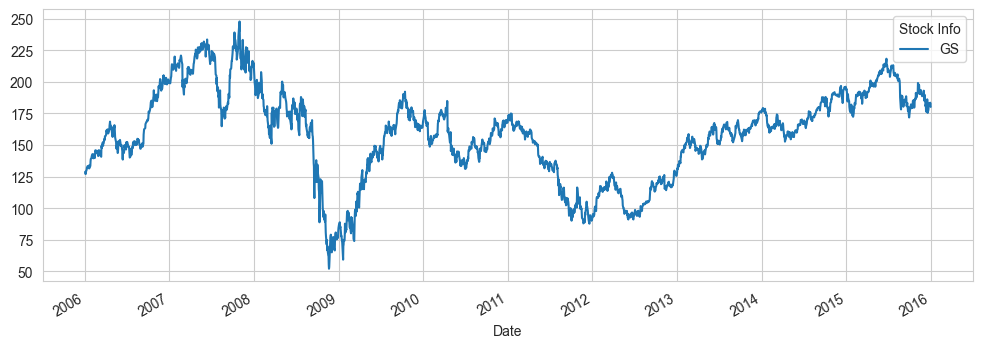

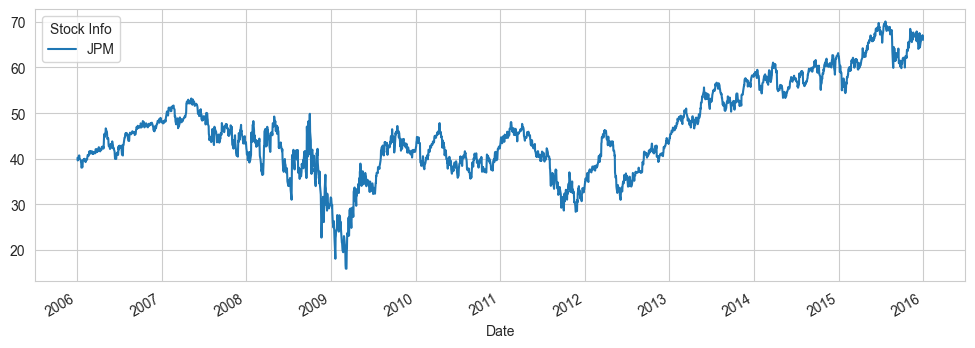

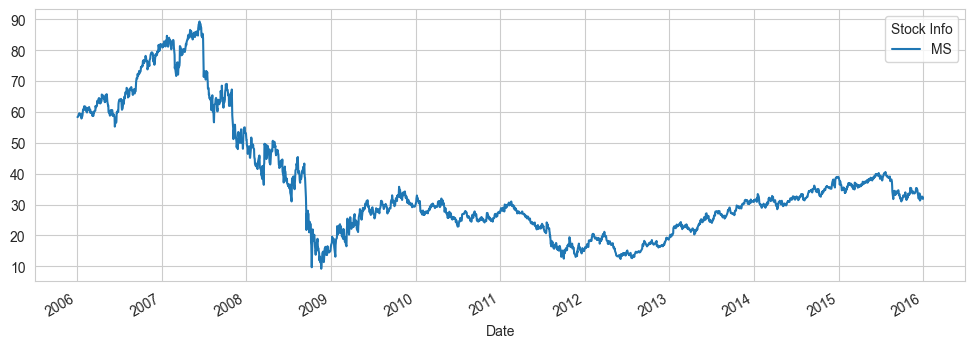

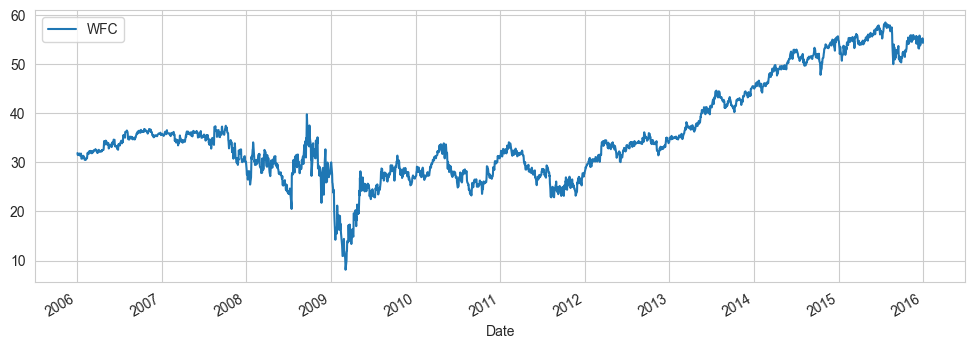

In [36]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize =(12,4))
plt.legend()
plt.show()

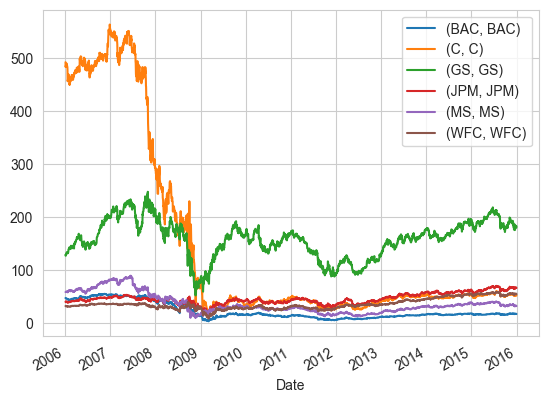

In [37]:
bank_stocks.xs(key='Close', axis=1, level='Date').plot()
plt.legend()
plt.show()


In [38]:
bank_stocks.xs(key='Close', axis=1, level='Date').iplot()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



 **Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x400 with 0 Axes>

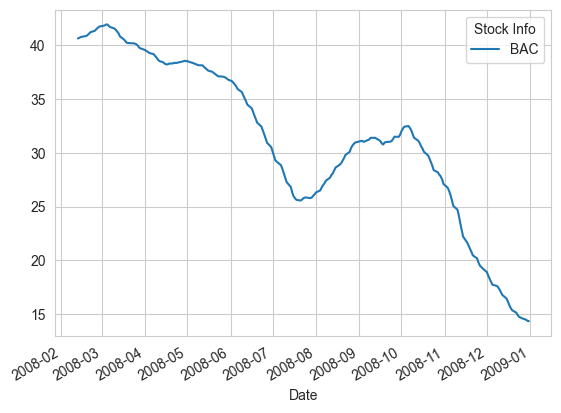

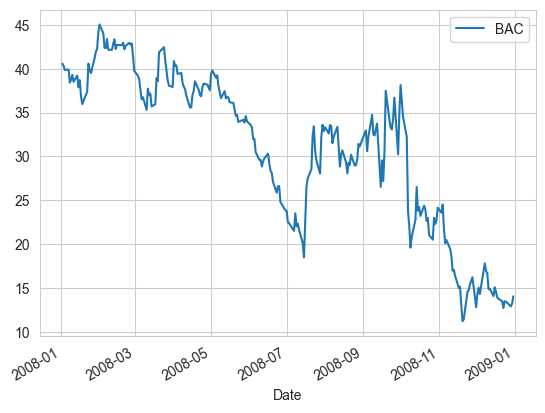

In [40]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 days Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

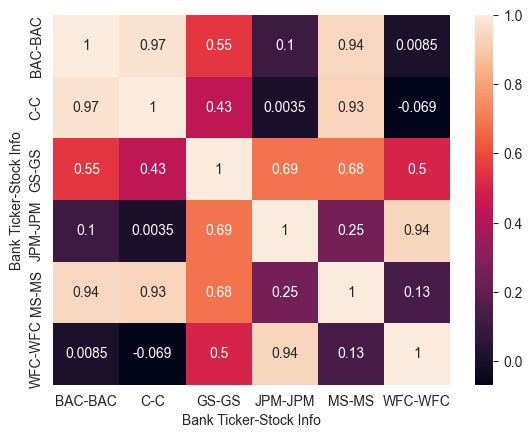

In [42]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Date').corr(),annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

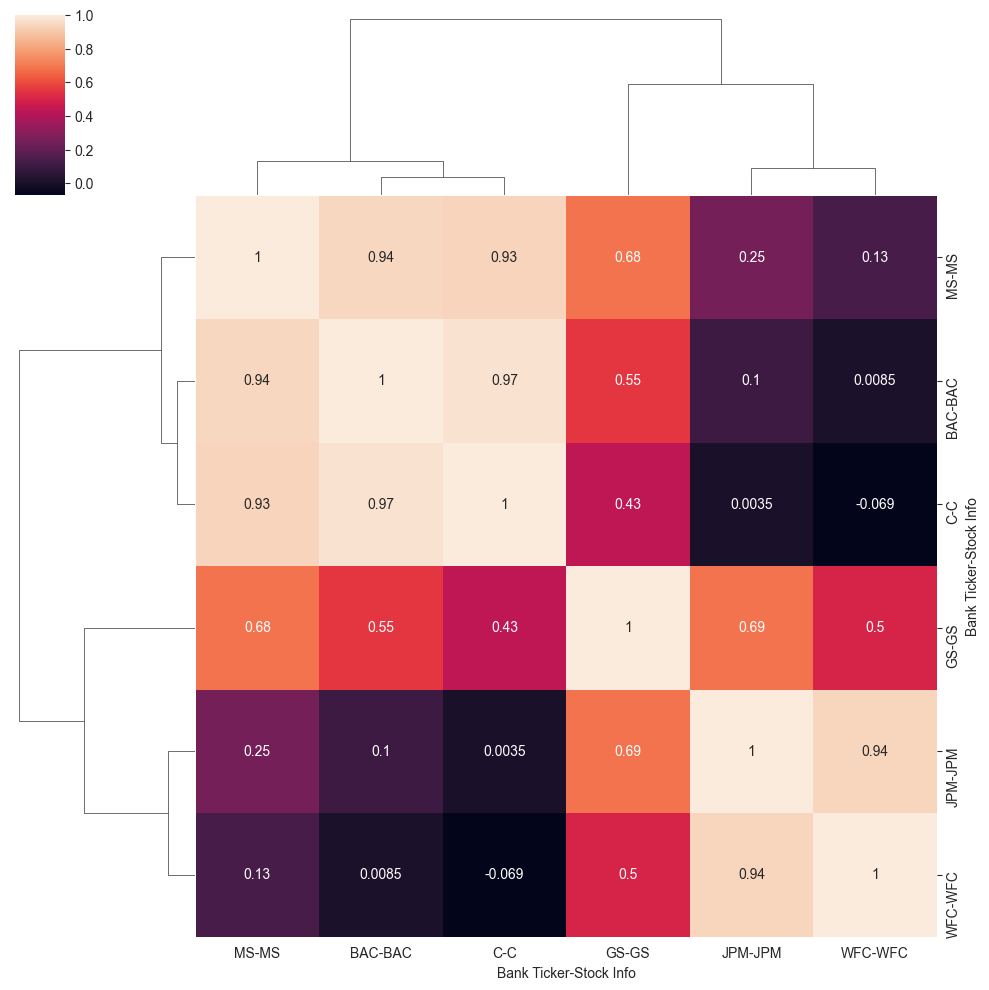

In [44]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Date').corr(),annot=True)
plt.show()

In [45]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Date').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

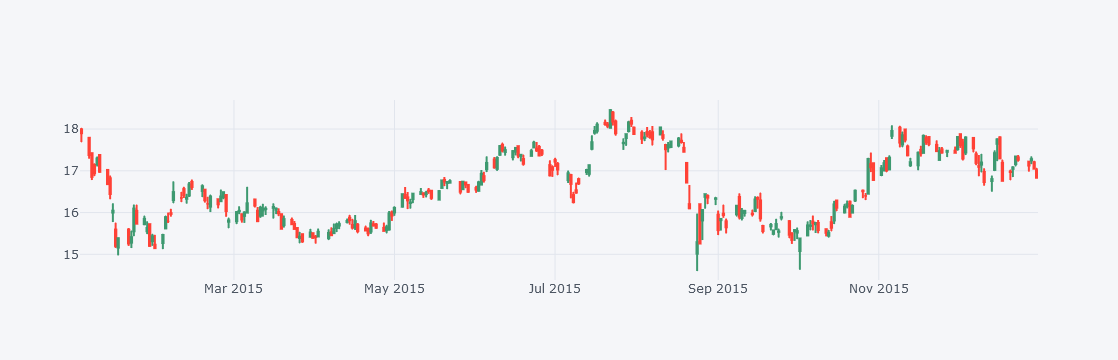

In [59]:
bac15 = bank_stocks['BAC'][['High','Low','Open','Close']].loc['2015-01-01':'2016-01-01']
bac15.columns = bac15.columns.get_level_values(0)
bac15.iplot(kind='candle')




** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [68]:
bank_stocks.index = bank_stocks.index.astype(str)

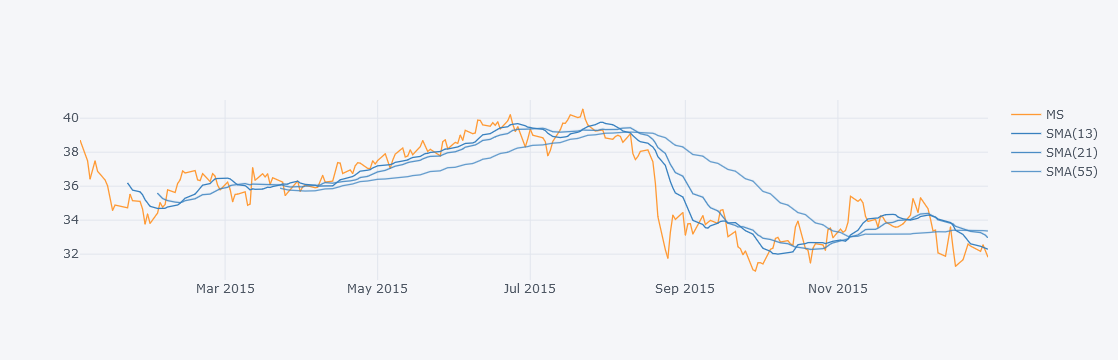

In [70]:
import pandas_ta as ta
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study ='sma',periods =[13,21,55])
plt.show()

Use.ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

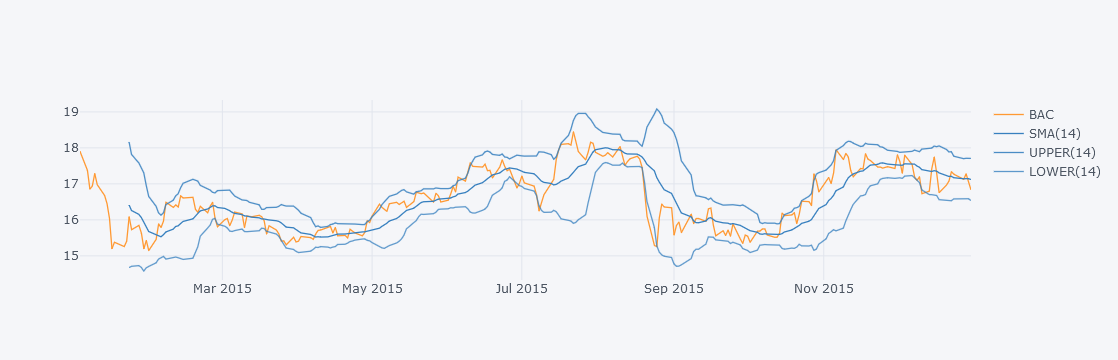

In [72]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')
plt.show()